In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%matplotlib inline
from sklearn.metrics import matthews_corrcoef
from sklearn.utils import shuffle
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)

In [2]:
train = pd.read_csv('case_study_bookings_train.csv', sep='\t')

In [3]:
train.head()

,ymd,user_id,session_id,referer_code,is_app,agent_id,traffic_type,has_booking
0,20170423,388309106223940,3052767322364990735,0,0,2,1,0
1,20170410,452426828488840,1022778951418899936,0,0,10,2,0
2,20170415,452426828488840,4191504489082712531,0,0,10,2,0
3,20170406,819438352219100,4560227804862289210,1,0,1,1,0
4,20170407,1113732603712480,4115013282086590434,0,0,9,2,0


##### Checking if there is any null value in booking_train dataset

In [4]:
print(train.isnull().values.sum())

0


##### Checking the frequency distribution of has_booking and not-has_booked in dataset

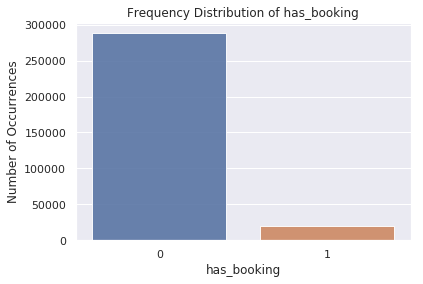

In [5]:
# calculating the frequency distribution of the data
import seaborn as sns
carrier_count = train['has_booking'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of has_booking')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('has_booking', fontsize=12)
plt.show()

##### As we can see dataset is more inclined towards not booked so, building new dataset to train classifier

In [6]:
df1 = train[train['has_booking']==1]

In [7]:
df1.shape

(19647, 8)

###### We can see 19647 rows favour booking

In [8]:
df0 = train[train['has_booking']==0]

###### In order to set right amount of rows were has_booking=0

In [9]:
times_of_df1 = 3.4

In [10]:
k = math.floor(19647*times_of_df1)

In [11]:
k

66799

In [12]:
df0 = df0[0:k]

In [13]:
df0.shape

(66799, 8)

In [14]:
data_equal = pd.concat([df0,df1])

In [15]:
data_equal.shape

(86446, 8)

In [16]:
data_equal.head()

,ymd,user_id,session_id,referer_code,is_app,agent_id,traffic_type,has_booking
0,20170423,388309106223940,3052767322364990735,0,0,2,1,0
1,20170410,452426828488840,1022778951418899936,0,0,10,2,0
2,20170415,452426828488840,4191504489082712531,0,0,10,2,0
3,20170406,819438352219100,4560227804862289210,1,0,1,1,0
4,20170407,1113732603712480,4115013282086590434,0,0,9,2,0


In [17]:
data_equal = shuffle(data_equal)

In [18]:
data_equal.head()

,ymd,user_id,session_id,referer_code,is_app,agent_id,traffic_type,has_booking
301037,20170407,9030444165608969899,7891212643045977346,0,0,7,1,1
61815,20170410,1849225563268908892,2636768380691539747,24,0,9,1,0
12267,20170418,367564968466146267,5832333554862951588,99,0,9,6,0
57064,20170406,1708857000852103713,313990858464931329,99,0,9,6,0
13666,20170404,413625365199114897,1112389107514631094,1,0,9,2,0


In [19]:
X_train = data_equal.iloc[:,3:7].values
y_train = data_equal.iloc[:,[7]].values

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

In [21]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [22]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix = confusion_matrix(y_test, y_pred)

In [24]:
print("Confusion matrix:")
confusion_matrix

Confusion matrix:


array([[16446,   222],
       [ 4655,   289]])

In [25]:
accuracy_score(y_pred=y_pred,y_true=y_test)

0.7743383305570979

##### Note: Every time I re-run the notebook. Accuracy value changes.
On the basis of different ratios of has_booking = 1 and has_booking=0, different accuracy with test size of 25% has been noted as follows:


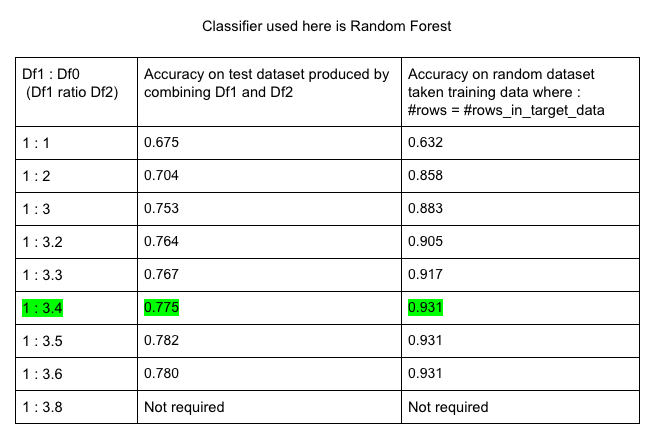

In [26]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity : ", TPR[0])
# Specificity or true negative rate
TNR = TN/(TN+FP)
print("Specificity : ",TNR[0])
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision : ",PPV[0])
# Negative predictive value
NPV = TN/(TN+FN)
print("Negative predictive value : ",NPV[0])
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False positive rate : ",FPR[0])
# False negative rate
FNR = FN/(TP+FN)
print("False negative rate : ", FNR[0])
# False discovery rate
FDR = FP/(TP+FP)
print("False discovery rate : ",FDR[0])
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy : ", ACC[0])

Sensitivity :  0.9866810655147589
Specificity :  0.058454692556634304
Precision :  0.7793943415004029
Negative predictive value :  0.5655577299412916
False positive rate :  0.9415453074433657
False negative rate :  0.01331893448524118
False discovery rate :  0.22060565849959718
Accuracy :  0.7743383305570979


In [27]:
# Fetching the data from target set

test_target = pd.read_csv("case_study_bookings_target.csv",sep="\t")
X_test_target = test_target.iloc[:,3:7].values
X_test_target_session = test_target.iloc[:,2].values

In [28]:
# checking how many rows are in our target set
test_target.shape

(30128, 7)

###### As we know target set comprises of 30128 rows, but it doesnot have y_true, so lets get equivalent random samples from booking_train data and see how much accuracy we are getting through the classifier

In [29]:
new_test_data = train.iloc[0:30128]

In [30]:
new_test_data.shape

(30128, 8)

In [31]:
X_test_new_test_data = new_test_data.iloc[:,3:7].values
y_test_new_test_data = new_test_data.iloc[:,[7]].values

In [32]:
# Predicting the New test set results
y_pred_new_test_set = classifier.predict(X_test_new_test_data)

In [33]:
accuracy_score(y_pred=y_pred_new_test_set,y_true=y_test_new_test_data)

0.9309612320764737

##### Note: Every time I re-run the notebook. Accuracy value changes.
We can see on some random values or we are getting high accuracy (93.01%) for Random Forest.
So, our classfier is fit to get our actual y_pred for the target_dataset given in question

In [34]:
# Predicting the orgional Test set results
y_pred_target = classifier.predict(X_test_target)

In [35]:
y_pred_target.shape

(30128,)

In [36]:
X_test_target_session.shape

(30128,)

In [37]:
df = pd.DataFrame({'session_id':X_test_target_session,'has_booking':y_pred_target}, columns=['session_id', 'has_booking'])

In [38]:
df.head()

,session_id,has_booking
0,4175939893794521966,0
1,9175174925268392332,0
2,5361965966177226983,0
3,7996347049132178025,0
4,6061498713259551906,0


In [39]:
df_final = df.session_id.astype(str).str.cat(df.has_booking.astype(str), sep=' ')

In [40]:
df_final.head()

0    4175939893794521966 0
1    9175174925268392332 0
2    5361965966177226983 0
3    7996347049132178025 0
4    6061498713259551906 0
Name: session_id, dtype: object

In [45]:
df_final.to_csv("Random_Forest.csv", sep='\t', encoding='utf-8',header=["session_id has_booking"], index=False)

In [46]:
np.count_nonzero(y_pred_target)

384

### Prediction using Random Forest done !